# Taller 1

**Contexto de negocio**: Inversiones inmobiliarias para alquiler vacacional.



*Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. Con la creciente popularidad de este modelo de negocio, es cada
vez más difícil tomar buenas decisiones respecto a los mejores sectores de la ciudad, tipos
de propiedad, entre otros factores, para lograr una rentabilidad adecuada a lo largo del
tiempo. Una vez que la propiedad se encuentra listada en la plataforma, asegurar una alta
tasa de ocupación estableciendo un precio por noche justo y un buen sistema de atención
a los usuarios es vital para el éxito del negocio.*

*Para este fin se le ha proporcionado un dataset de propiedades listadas en AirBnb para
una ciudad específica. Por cada propiedad se encuentran atributos como ubicación,
detalles del host, tipo de propiedad, precio, disponibilidad futura, calificaciones, entre
otros. El diccionario detallado de los datos lo encuentra aquí.
Mediante el uso de técnicas estadísticas y de visualización de datos se espera que usted
esté en capacidad de descubrir patrones, tendencias y oportunidades que puedan ser de
interés para un inversionista.*

## 1. Seleccion del dataset de trabajo

In [1]:
import os
import subprocess

In [2]:
CITY = "South Aegean, South Aegean, Greece"
# Al iniciar la ejecución del script, se debe validar que la siguiente URL sea válida
URL_DETAILDED_LISTINGS_DATA = "https://data.insideairbnb.com/greece/south-aegean/south-aegean/2024-06-22/data/listings.csv.gz"

FILE_NAME = "listings.csv.gz"
DATA_DIR = "data"
DATA_PATH = os.path.join(DATA_DIR, FILE_NAME)

In [3]:
# Crear la carpeta para los datos
if not os.path.exists(DATA_DIR):
    print(f"Creando carpeta '{DATA_DIR}' ...")
    os.makedirs(DATA_DIR)
# Descargar el archivo desde la url
print("Descargando archivo ...")
subprocess.run(
    [
        "wget",
        URL_DETAILDED_LISTINGS_DATA
    ],
    check=True
)
# Mover el archivo descargado a su carpeta
print(f"Moviendo archivo a la carpeta '{DATA_DIR}'...")
subprocess.run(
    [
        "mv",
        FILE_NAME,
        DATA_PATH
    ],
    check=True
)
# Si hay error en la descarga, valide la url.
# No es necesario descomprimir el archivo,
# Las funcionalidades de pandas nos permiten su manejo.

Descargando archivo ...
[0] Downloading 'https://data.insideairbnb.com/greece/south-aegean/south-aegean/2024-06-22/data/listings.csv.gz' ...
Saving 'listings.csv.gz'
HTTP response 200  [https://data.insideairbnb.com/greece/south-aegean/south-aegean/2024-06-22/data/listings.csv.gz]
Moviendo archivo a la carpeta 'data'...


CompletedProcess(args=['mv', 'listings.csv.gz', 'data/listings.csv.gz'], returncode=0)

## 2. Entendimiento inicial de los datos

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [5]:
df_copy = pd.read_csv(DATA_PATH, compression="gzip")
df = df_copy.copy() # Con la copia, sobreescribo directamente sobre las columnas

In [6]:
# Informacion del df (Dimension y Dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33558 entries, 0 to 33557
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            33558 non-null  int64  
 1   listing_url                                   33558 non-null  object 
 2   scrape_id                                     33558 non-null  int64  
 3   last_scraped                                  33558 non-null  object 
 4   source                                        33558 non-null  object 
 5   name                                          33558 non-null  object 
 6   description                                   32482 non-null  object 
 7   neighborhood_overview                         15837 non-null  object 
 8   picture_url                                   33558 non-null  object 
 9   host_id                                       33558 non-null 

In [7]:
# Muestra de 5 filas
df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23832,849977589209953650,https://www.airbnb.com/rooms/849977589209953650,20240622134515,2024-06-25,city scrape,Platanos Cycladic house,Platanos Cycladic house,"Platanos cycladic house is a special, authenti...",https://a0.muscache.com/pictures/prohost-api/H...,505965735,https://www.airbnb.com/users/show/505965735,Argiris,2023-03-18,NaN,NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/24cf4...,https://a0.muscache.com/im/pictures/user/24cf4...,NaN,1,1,"['email', 'phone']",t,t,"Panormos, Greece",Τήνου (Tinos),NaN,37.638220,25.041780,Entire home,Entire home/apt,5,1.0,1 bath,2.0,3.0,"[""Bed linens"", ""Dishes and silverware"", ""Body ...",$145.00,2,365,2,5,365,365,2.4,365.0,NaN,t,18,23,52,164,2024-06-25,2,2,0,2023-07-18,2024-05-18,4.50,5.00,5.00,4.50,4.50,5.00,4.5,00001960800,t,1,1,0,0,0.17
4207,16067313,https://www.airbnb.com/rooms/16067313,20240622134515,2024-06-25,city scrape,Terra Nullius,"The cave ""Terra Nullius"" is located at Plakota...","Within a distance of 5 km,you can reach severa...",https://a0.muscache.com/pictures/825bdd5c-624d...,104664865,https://www.airbnb.com/users/show/104664865,Victoria,2016-11-21,NaN,"Hi, I'm Aimilia. My sister and I are looking f...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/15af2...,https://a0.muscache.com/im/pictures/user/15af2...,NaN,1,1,"['email', 'phone']",t,t,"Cyklades, Greece",Μήλου (Milos),NaN,36.711660,24.387800,Cave,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Bed linens"", ""Bay view"", ""HDTV"", ""Dishes and...",$180.00,4,1125,1,4,1125,1125,4.0,1125.0,NaN,t,19,33,61,69,2024-06-25,33,6,0,2017-05-26,2023-09-05,4.85,4.85,4.97,4.79,4.85,4.76,4.7,00000185963,f,1,1,0,0,0.38
17446,51546064,https://www.airbnb.com/rooms/51546064,20240622134515,2024-06-25,city scrape,"Villa Helias 4Bed Lux Retreat, Private Pool, Gym","Undoubtedly, Villa Helias stands among the top...","Our location is very quiet, only 5 min drive f...",https://a0.muscache.com/pictures/miso/Hosting-...,24182469,https://www.airbnb.com/users/show/24182469,Korinna,2014-11-26,"Athens, Greece","I am Korinna, the managing Director of Heliade...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7c47e...,https://a0.muscache.com/im/pictures/user/7c47e...,NaN,4,4,"['email', 'phone']",t,t,"Kato Fellos, Greece",Άνδρου (Andros),NaN,37.908190,24.718580,Entire villa,Entire home/apt,8,4.0,4 baths,4.0,5.0,"[""Bed linens"", ""Bay view"", ""Self check-in"", ""D...",$592.00,4,1125,4,7,1125,1125,4.4,1125.0,NaN,t,11,18,41,79,2024-06-25,1,1,0,2024-05-06,2024-05-06,5.00,5.00,5.00,4.00,5.00,4.00,5.0,00001613932,t,4,4,0,0,0.59
23104,815292655039358213,https://www.airbnb.com/rooms/815292655039358213,2

In [8]:
# Registros duplicados
df[df.duplicated()].shape

(0, 75)

### Selección de atributos

1. `price`, permite evaluar la rentabilidad para los inversionistas, y estrategias de fijación de precios para atraer mas usuarios.
2. `neighbourhood_cleansed`, es la variable de ubicacion espacial que explica de a donde se refieren los registros que se analizan
3. `number_of_reviews`, es una variable que podemos aproximar con la ocupación indicando la frecuencia de reservas
4. `reviews_per_month`, es un indicador de la actividad en meses, al enlazarse con el numero de reseñas
5. `room_type`, explica que demanda tienen diferentes propiedades, y podria relacionarse al precio y demas factores, claves para el inversor.

#### Análisis univariado `price`

In [9]:
# Registros nulos
df["price"].isnull().sum()

1105

In [10]:
df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
# Estadísticos
df["price"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    32453.000000
mean       320.759591
std        721.188796
min         10.000000
5%          55.000000
25%         93.000000
50%        150.000000
75%        291.000000
95%       1000.000000
max      23046.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price distribution')

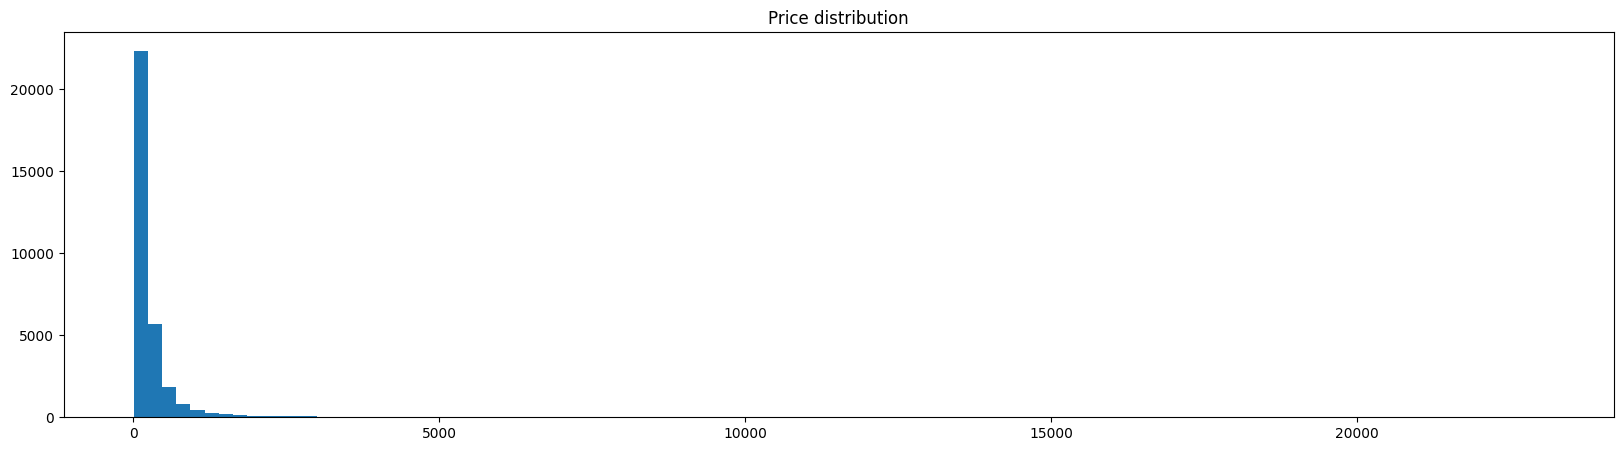

In [12]:
# Histogram for price
plt.figure(figsize=(20, 5))
plt.hist(df["price"], bins=100)
plt.title("Price distribution")

198.0

Text(0.5, 1.0, 'Price distribution')

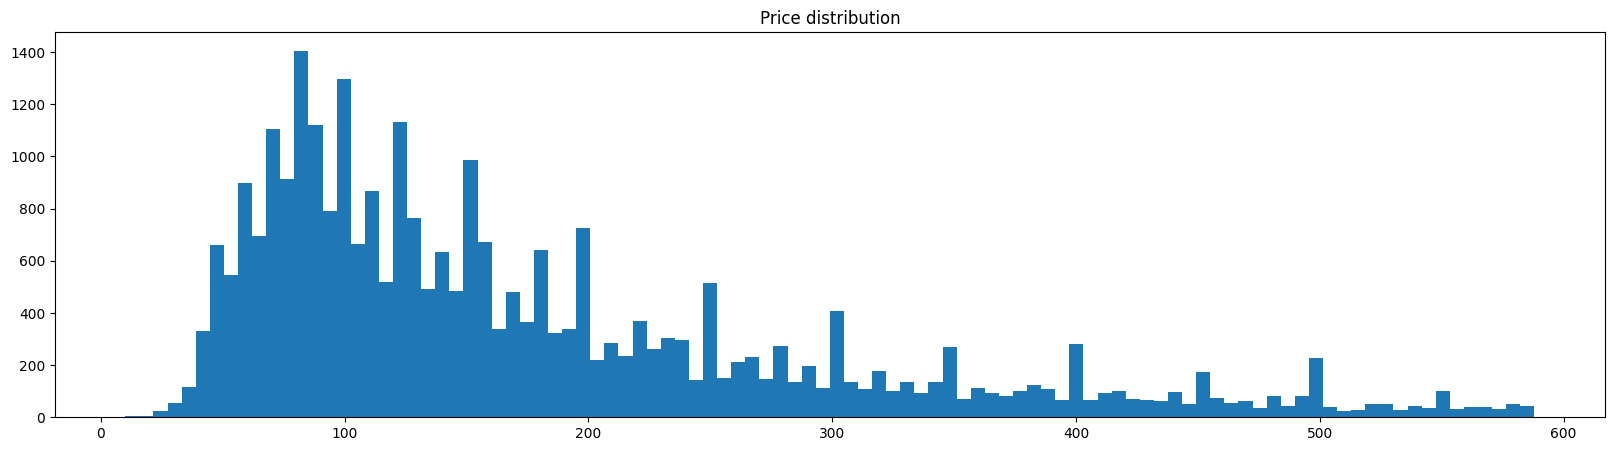

In [13]:
# Outlier threshold
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
display(iqr)
plt.figure(figsize=(20, 5))
plt.hist(df.loc[df["price"] <= (q3 + 1.5 * iqr)]["price"], bins=100)
plt.title("Price distribution")

#### Análisis univariado `neighbourhood_cleansed`

In [14]:
# Registros nulos
df["neighbourhood_cleansed"].isnull().sum()

0

In [15]:
# Estadísticos
df["neighbourhood_cleansed"].describe(include='object')

count                 33558
unique                   34
top       Θήρας (Santorini)
freq                   5409
Name: neighbourhood_cleansed, dtype: object

In [16]:
# Calcular la frecuencia de los areas
neighbourhood_counts = df['neighbourhood_cleansed'].value_counts()
neighbourhood_counts

neighbourhood_cleansed
Θήρας (Santorini)                                   5409
Ρόδου (Rhodes)                                      5172
Μυκόνου (Μykonos)                                   4025
Πάρου (Paros)                                       3611
Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)    3448
Τήνου (Tinos)                                       1493
Μήλου (Milos)                                       1254
Σύρου - Ερμούπολης (Syros)                          1141
Κω (Kos)                                            1109
Άνδρου (Andros)                                     1053
Σίφνου (Sifnos)                                      690
Καρπάθου (Karpathos)                                 541
Καλυμνίων (Kalymnos)                                 500
Κέας (Kea)                                           498
Σερίφου (Seriphos)                                   440
Κύθνου (Kythnos)                                     398
Ιητών (Ios)                                          394
Αμοργού 

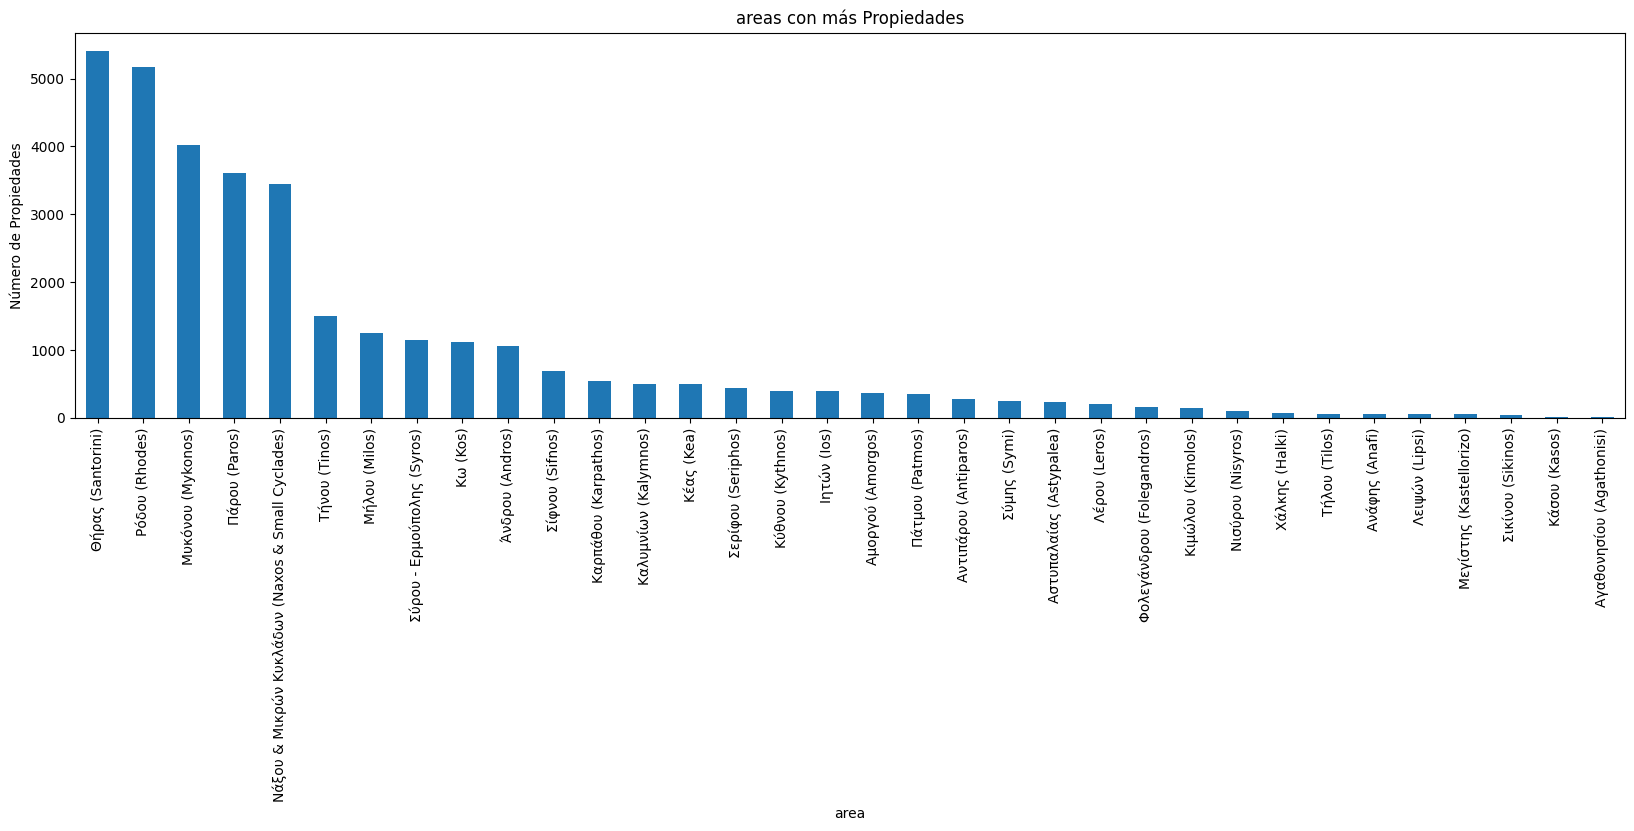

In [17]:
# Visualizar la distribucion de los areas
plt.figure(figsize=(20,5))
neighbourhood_counts.plot(kind='bar')
plt.title('areas con más Propiedades')
plt.xlabel('area')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.show()

#### Análisis univariado `number_of_reviews`

In [18]:
# Registros nulos
df["number_of_reviews"].isnull().sum()

0

In [19]:
# Estadísticos
df["number_of_reviews"].describe()

count    33558.000000
mean        19.292985
std         38.536370
min          0.000000
25%          0.000000
50%          5.000000
75%         21.000000
max       1933.000000
Name: number_of_reviews, dtype: float64

Text(0.5, 1.0, 'Number of reviews distribution')

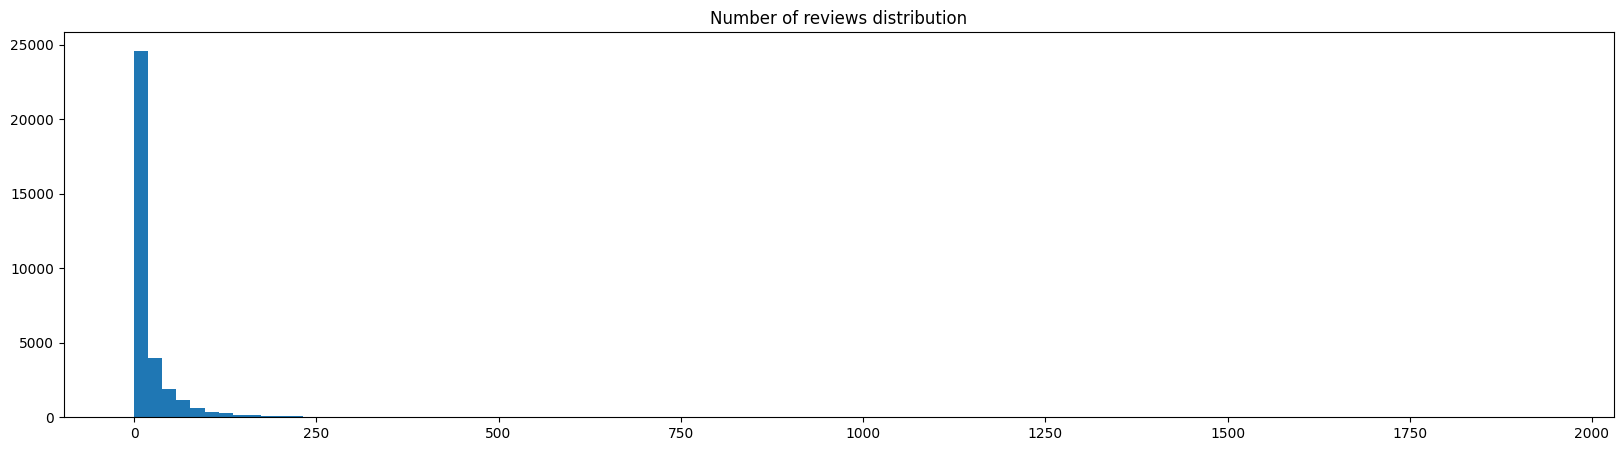

In [20]:
# Histogram for Number of reviews
plt.figure(figsize=(20, 5))
plt.hist(df["number_of_reviews"], bins=100)
plt.title("Number of reviews distribution")

21.0

Text(0.5, 1.0, 'Number of reviews distribution')

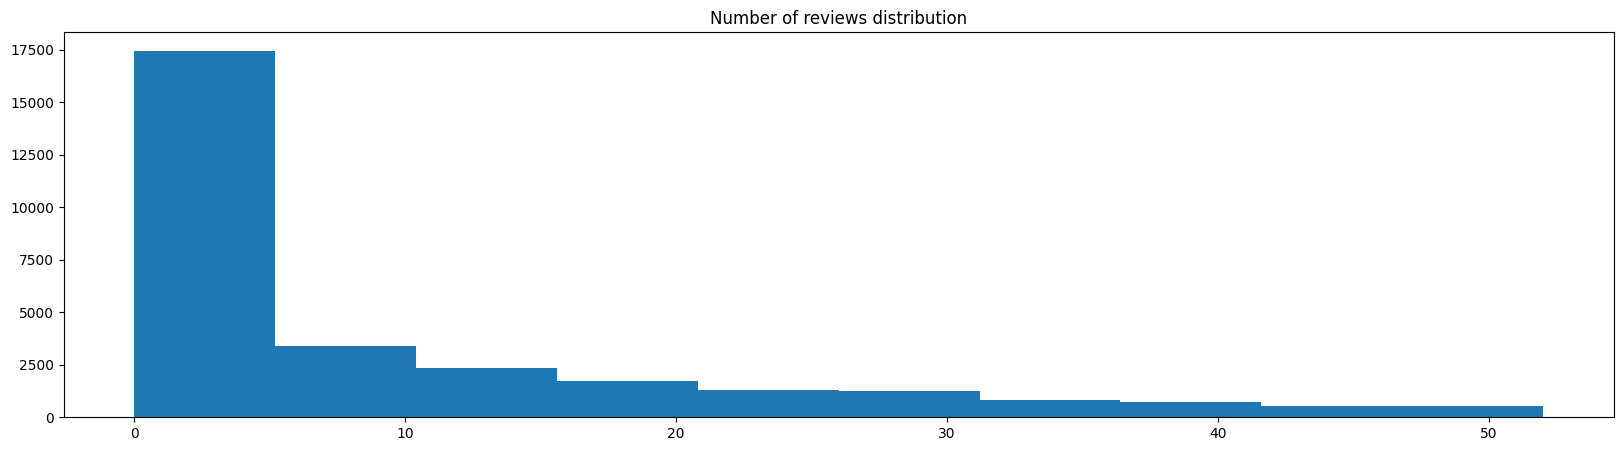

In [21]:
# Outlier threshold
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1
display(iqr)
plt.figure(figsize=(20, 5))
plt.hist(df.loc[df["number_of_reviews"] <= (q3 + 1.5 * iqr)]["number_of_reviews"])
plt.title("Number of reviews distribution")

#### Análisis univariado `reviews_per_month`

In [22]:
# Registros nulos
df["reviews_per_month"].isnull().sum()

9071

In [23]:
# Estadísticos
df["reviews_per_month"].describe()

count    24487.000000
mean         0.616037
std          0.731623
min          0.010000
25%          0.150000
50%          0.360000
75%          0.830000
max         22.340000
Name: reviews_per_month, dtype: float64

Text(0.5, 1.0, 'Reviews per month distribution')

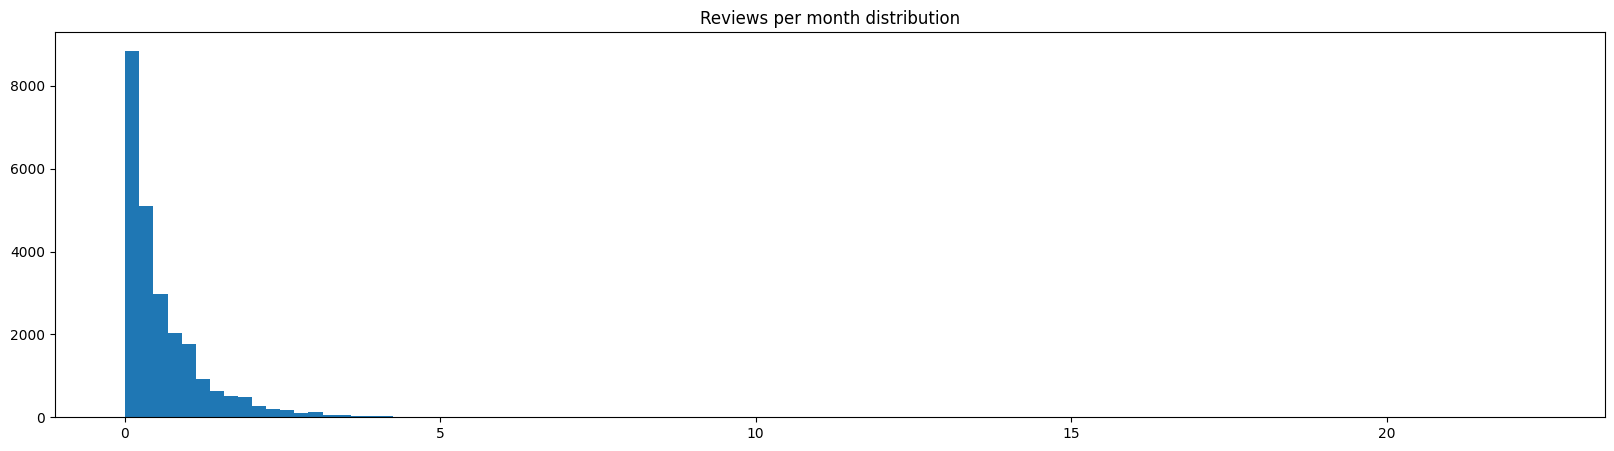

In [24]:
# Histogram for Reviews per month
plt.figure(figsize=(20, 5))
plt.hist(df["reviews_per_month"], bins=100)
plt.title("Reviews per month distribution")

0.6799999999999999

Text(0.5, 1.0, 'Reviews per month distribution')

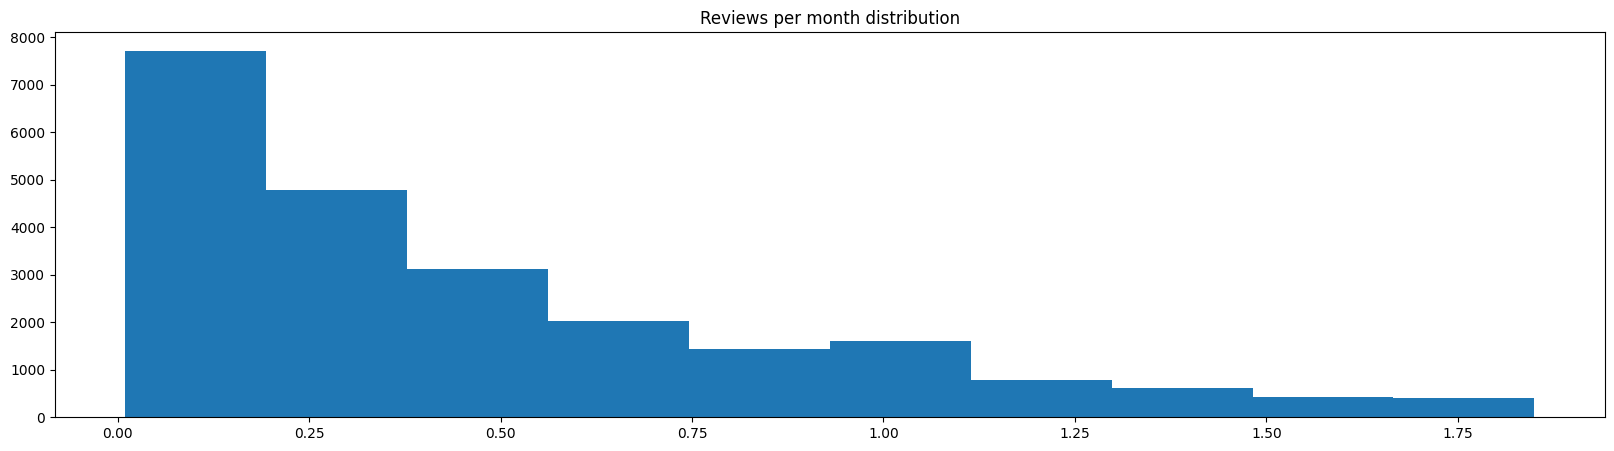

In [25]:
# Outlier threshold
q1 = df["reviews_per_month"].quantile(0.25)
q3 = df["reviews_per_month"].quantile(0.75)
iqr = q3 - q1
display(iqr)
plt.figure(figsize=(20, 5))
plt.hist(df.loc[df["reviews_per_month"] <= (q3 + 1.5 * iqr)]["reviews_per_month"])
plt.title("Reviews per month distribution")

#### Análisis univariado `room_type`

In [26]:
# Registros nulos
df["room_type"].isnull().sum()

0

In [27]:
# Estadísticos
df["room_type"].describe(include='object')

count               33558
unique                  4
top       Entire home/apt
freq                28853
Name: room_type, dtype: object

In [28]:
# Calcular la frecuencia de los tipos de cuartos
room_type_counts = df['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    28853
Private room        4188
Hotel room           503
Shared room           14
Name: count, dtype: int64

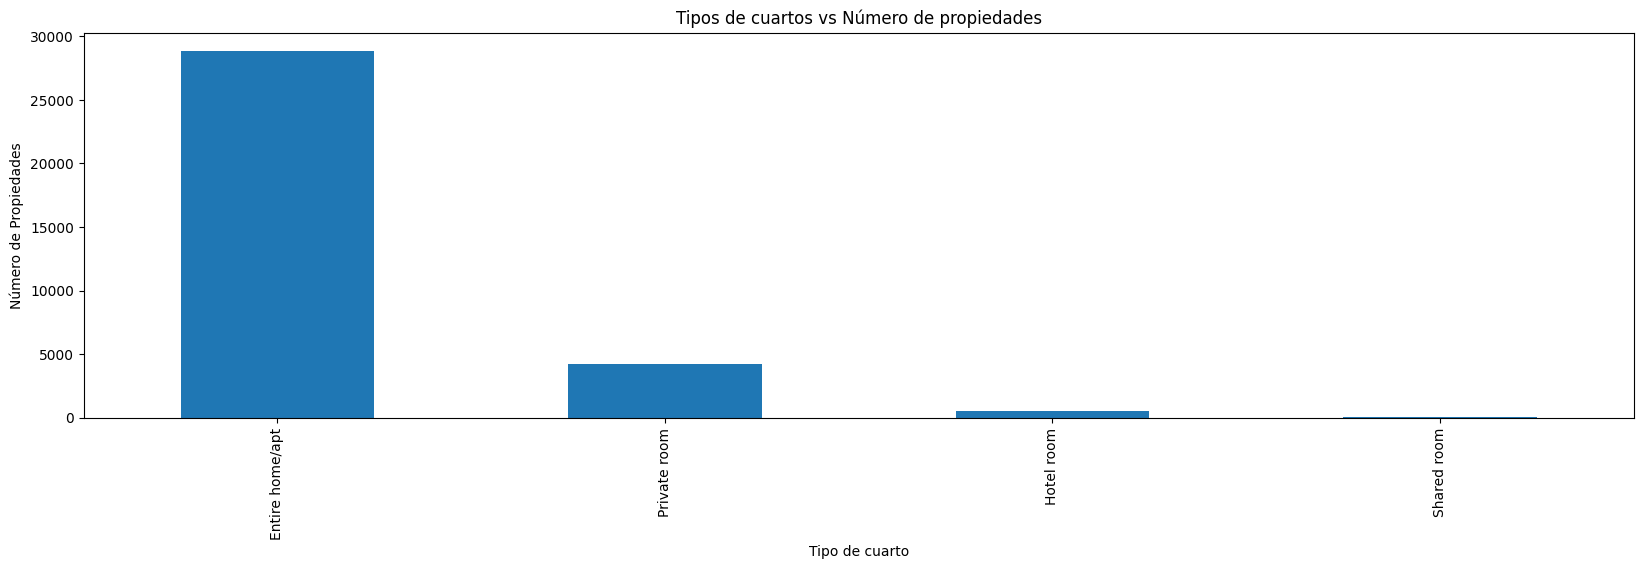

In [29]:
# Visualizar la distribucion de los tipos de cuartos
plt.figure(figsize=(20,5))
room_type_counts.plot(kind='bar')
plt.title('Tipos de cuartos vs Número de propiedades')
plt.xlabel('Tipo de cuarto')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.show()

## 3. Estrategia de análisis

Para determinar la mejor opción de inversión inmobiliaria en Airbnb, comenzaré filtrando para las columnas que he seleccionado para mi análisis, asegurando la calidad de los datos. Esto implicará unicamente la eliminación de filas con valores nulos a partir de las columnas clave: **price** y **reviews_per_month**, teniendo en cuenta que en la exploración de datos inicial no hay duplicados o errores en el formato, y **price** se ha cambiado al type float. No imputaré valores, ya que cuento con un conjunto de datos grande (Muestra suficiente) y no quiero añadir sesgo o introducir errores. Además, removere datos atípicos y agruparé las categorías de baja frecuencia en `neighbourhood_cleansed` en un grupo "Otros" para mitigar el desbalance de sus categórias. Este proceso de limpieza garantizará que los análisis posteriores sean precisos y relevantes.

Una vez limpias las variables, procederé con un análisis bivariado entre **price**, **neighbourhood_cleansed**, **number_of_reviews**, **reviews_per_month**, y **room_type**. Utilizaré **gráficos de dispersión**, **boxplots** e **histogramas** para comparar la distribución de precios según area y tipo de habitación, etc., lo que me permitirá identificar patrones de rentabilidad y demanda. También analizaré las relaciones del **precio promedio por area**, las **reseñas promedio por mes**, y la **relación precio/reseñas** para medir la rentabilidad. Finalmente, realizaré un **ANOVA** para comparar precios entre areas y tipo de habitación, apoyando mis conclusiones con el análisis del anova (identificación de mejoras) y la ejecucion de un segundo modelo que me permita, a partir de la segmentación, entender que areas y tipo de habitaciones son óptimas para la inversión al compararlas diferencias con el numero de reseñas, que explicarian si hay mas demanda por algún segemento en especial.

## 4. Desarrollo de la estrategia

### I. Asegurar la calidad de los datos

In [30]:
def remove_outliers_iqr_multiple(df, columnas):
    """
    Remueve outliers de múltiples columnas en un DataFrame basado en el rango intercuartílico (IQR).
    
    Args:
        df (pd.DataFrame): El DataFrame del que se eliminarán los outliers.
        columnas (list): Lista de nombres de las columnas en las que se buscarán los outliers.
        
    Returns:
        pd.DataFrame: El DataFrame sin outliers en las columnas especificadas.
    """
    df_cleaned = df.copy()

    for columna in columnas:
        q1 = df_cleaned[columna].quantile(0.25)
        q3 = df_cleaned[columna].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        df_cleaned = df_cleaned.loc[(df_cleaned[columna] >= lower_bound) & (df_cleaned[columna] <= upper_bound)]
        
    return df_cleaned

In [31]:
# Filtrar el dataset
df_filtered = df[["price", "neighbourhood_cleansed", "number_of_reviews", "reviews_per_month", "room_type"]]
df_filtered.sample(3)

,price,neighbourhood_cleansed,number_of_reviews,reviews_per_month,room_type
19215,69.0,Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades),35,1.47,Entire home/apt
32796,136.0,Ρόδου (Rhodes),0,NaN,Entire home/apt
24659,247.0,Θήρας (Santorini),2,0.17,Private room


In [32]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33558 entries, 0 to 33557
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   32453 non-null  float64
 1   neighbourhood_cleansed  33558 non-null  object 
 2   number_of_reviews       33558 non-null  int64  
 3   reviews_per_month       24487 non-null  float64
 4   room_type               33558 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


In [33]:
# Evaluar la eliminacion de nulos
df_filtered["reviews_per_month"].isnull().sum()/df_filtered.shape[0]

0.2703081232492997

In [34]:
df_filtered["price"].isnull().sum()/df_filtered.shape[0]

0.03292806484295846

In [35]:
# El 27% de las filas no tienen valores de `reviews_per_month` y el 3% no tiene precio
# Ese valor (27%) es muy alto para imputarlo, y borrarlo es una perdida de datos significativa,
# Sin embargo, sin nulos aun quedarian bastantes registros, por lo que eliminar los nulos esta bien para mi.
df_filtered_not_null = df_filtered.dropna(subset=["price", "reviews_per_month"])
df_filtered_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23894 entries, 0 to 33420
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   23894 non-null  float64
 1   neighbourhood_cleansed  23894 non-null  object 
 2   number_of_reviews       23894 non-null  int64  
 3   reviews_per_month       23894 non-null  float64
 4   room_type               23894 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [36]:
# Agrupar areas de baja frecuencia en otros
# Umbral: 400 registros por area
threshold = 400
frequency_counts = df_filtered_not_null['neighbourhood_cleansed'].value_counts()
frequency_counts

neighbourhood_cleansed
Θήρας (Santorini)                                   3801
Ρόδου (Rhodes)                                      3609
Πάρου (Paros)                                       2695
Μυκόνου (Μykonos)                                   2530
Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)    2479
Τήνου (Tinos)                                       1084
Μήλου (Milos)                                       1056
Κω (Kos)                                             834
Σύρου - Ερμούπολης (Syros)                           787
Άνδρου (Andros)                                      719
Σίφνου (Sifnos)                                      567
Κέας (Kea)                                           394
Καλυμνίων (Kalymnos)                                 347
Σερίφου (Seriphos)                                   342
Καρπάθου (Karpathos)                                 339
Ιητών (Ios)                                          304
Αμοργού (Amorgos)                                    298
Κύθνου (

In [37]:
low_frequency_categories = frequency_counts[frequency_counts < threshold].index
low_frequency_categories

Index(['Κέας (Kea)', 'Καλυμνίων (Kalymnos)', 'Σερίφου (Seriphos)',
       'Καρπάθου (Karpathos)', 'Ιητών (Ios)', 'Αμοργού (Amorgos)',
       'Κύθνου (Kythnos)', 'Πάτμου (Patmos)', 'Σύμης (Symi)',
       'Αντιπάρου (Antiparos)', 'Αστυπαλαίας (Astypalea)', 'Κιμώλου (Kimolos)',
       'Φολεγάνδρου (Folegandros)', 'Λέρου (Leros)', 'Νισύρου (Nisyros)',
       'Χάλκης (Halki)', 'Ανάφης (Anafi)', 'Μεγίστης (Kastellorizo)',
       'Τήλου (Tilos)', 'Σικίνου (Sikinos)', 'Λειψών (Lipsi)',
       'Κάσου (Kasos)'],
      dtype='object', name='neighbourhood_cleansed')

In [38]:
df_clean = remove_outliers_iqr_multiple(df_filtered_not_null, ["price", "number_of_reviews", "reviews_per_month"])
df_clean['neighbourhood_cleansed'] = df_clean['neighbourhood_cleansed'].replace(low_frequency_categories, 'Others')
df_clean

,price,neighbourhood_cleansed,number_of_reviews,reviews_per_month,room_type
0,280.0,Πάρου (Paros),7,0.06,Entire home/apt
1,378.0,Θήρας (Santorini),9,0.08,Entire home/apt
2,430.0,Θήρας (Santorini),11,0.09,Entire home/apt
4,45.0,Others,42,0.31,Entire home/apt
6,123.0,Πάρου (Paros),51,0.38,Entire home/apt
...,...,...,...,...,...
33343,85.0,Πάρου (Paros),1,1.00,Private room
33378,140.0,Θήρας (Santorini),1,1.00,Entire home/apt
33393,136.0,Θήρας (Santorini),1,1.00,Private room
33408,123.0,Θήρας (Santorini),1,1.00,Private room


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18573 entries, 0 to 33420
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   18573 non-null  float64
 1   neighbourhood_cleansed  18573 non-null  object 
 2   number_of_reviews       18573 non-null  int64  
 3   reviews_per_month       18573 non-null  float64
 4   room_type               18573 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 870.6+ KB


### II. Análisis bivariado

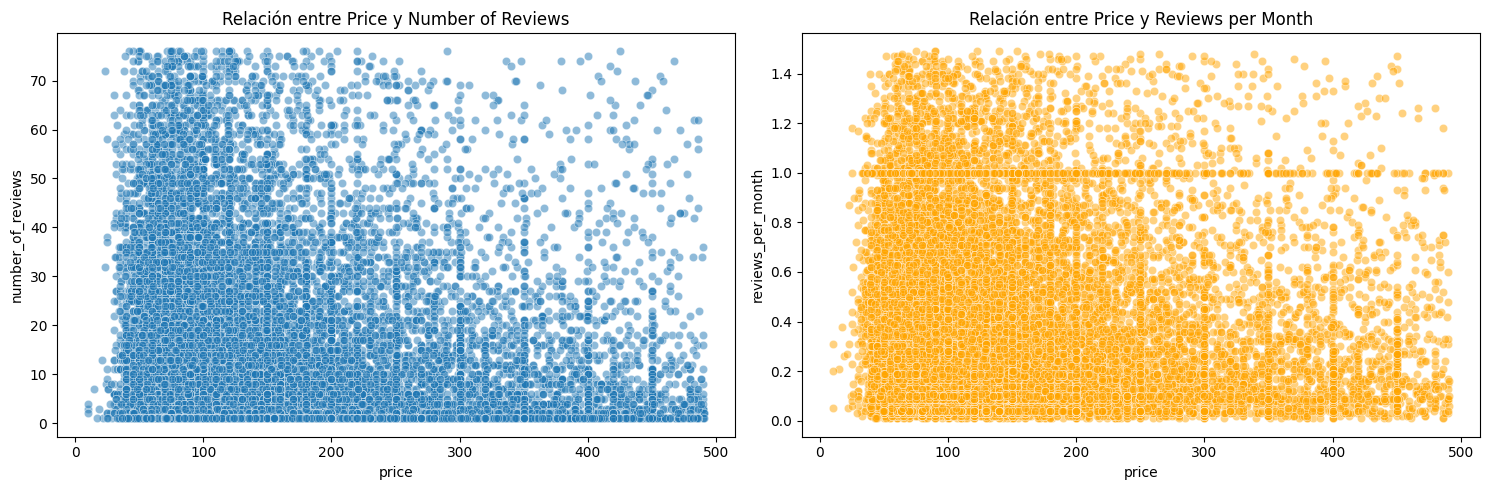

In [40]:
plt.figure(figsize=(15, 5))

# Gráfico de dispersión para price vs number_of_reviews
plt.subplot(1, 2, 1)
sns.scatterplot(x='price', y='number_of_reviews', data=df_clean, alpha=0.5)
plt.title('Relación entre Price y Number of Reviews')

# Gráfico de dispersión para price vs reviews_per_month
plt.subplot(1, 2, 2)
sns.scatterplot(x='price', y='reviews_per_month', data=df_clean, alpha=0.5, color='orange')
plt.title('Relación entre Price y Reviews per Month')

plt.tight_layout()
plt.show()

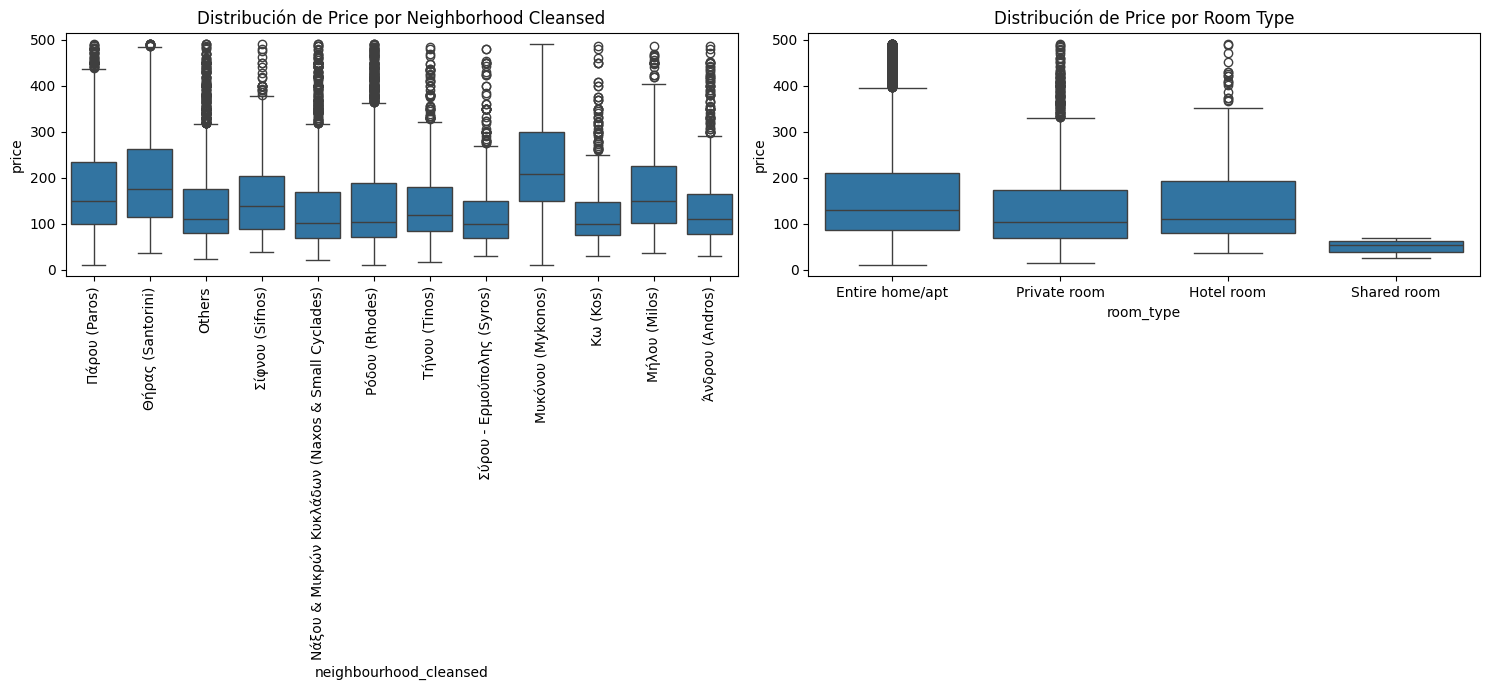

In [41]:
plt.figure(figsize=(15, 7))

# Boxplot para price vs neighbourhood_cleansed
plt.subplot(1, 2, 1)
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_clean)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.title('Distribución de Price por Neighborhood Cleansed')

# Boxplot para price vs room_type
plt.subplot(1, 2, 2)
sns.boxplot(x='room_type', y='price', data=df_clean)
plt.title('Distribución de Price por Room Type')

plt.tight_layout()
plt.show()

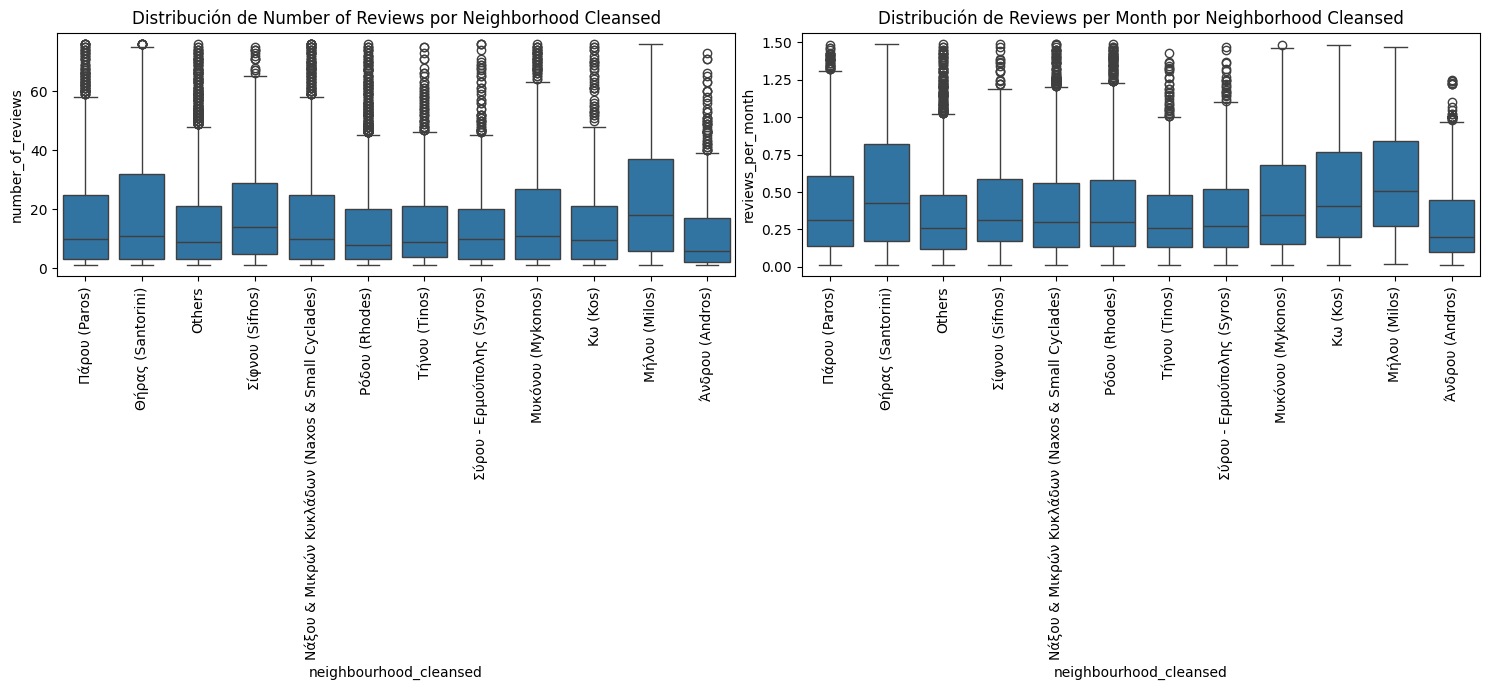

In [42]:
plt.figure(figsize=(15, 7))

# Gráfico de dispersión para neighbourhood_cleansed vs number_of_reviews
plt.subplot(1, 2, 1)
sns.boxplot(x='neighbourhood_cleansed', y='number_of_reviews', data=df_clean)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.title('Distribución de Number of Reviews por Neighborhood Cleansed')

# Gráfico de dispersión para neighbourhood_cleansed vs reviews_per_month
plt.subplot(1, 2, 2)
sns.boxplot(x='neighbourhood_cleansed', y='reviews_per_month', data=df_clean)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.title('Distribución de Reviews per Month por Neighborhood Cleansed')

plt.tight_layout()
plt.show()

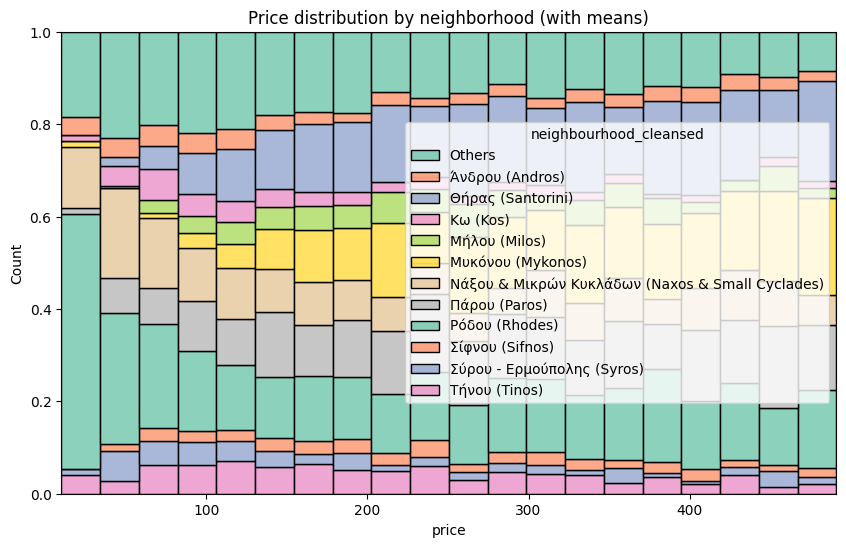

In [43]:
# Plotting price distribution by neighborhood
df_clean['neighbourhood_cleansed'] = pd.Categorical(df_clean['neighbourhood_cleansed'])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(
    data=df_clean,
    x="price",
    hue="neighbourhood_cleansed",
    bins=20,
    ax=ax,
    multiple='fill',
    palette='Set2'
)

plt.title("Price distribution by neighborhood (with means)")
plt.show()

### III. Relaciones

In [44]:
# Precio promedio por area
precio_promedio_area = df_clean.groupby('neighbourhood_cleansed', observed=True)['price'].mean()
precio_promedio_area.columns = ['neighbourhood_cleansed', 'precio_promedio']
print("Precio promedio por area:\n", precio_promedio_area)

Precio promedio por area:
 neighbourhood_cleansed
Others                                              140.735537
Άνδρου (Andros)                                     140.819423
Θήρας (Santorini)                                   199.635762
Κω (Kos)                                            124.469945
Μήλου (Milos)                                       177.226490
Μυκόνου (Μykonos)                                   230.580484
Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)    137.885381
Πάρου (Paros)                                       178.130769
Ρόδου (Rhodes)                                      145.022215
Σίφνου (Sifnos)                                     161.157783
Σύρου - Ερμούπολης (Syros)                          124.332861
Τήνου (Tinos)                                       146.151335
Name: price, dtype: float64


In [45]:
# Reseñas promedio por mes por area
reseñas_promedio_mes_area = df_clean.groupby('neighbourhood_cleansed', observed=True)['reviews_per_month'].mean().reset_index()
reseñas_promedio_mes_area.columns = ['neighbourhood_cleansed', 'reseñas_promedio_mes']
print("\nReseñas promedio por mes por area:\n", reseñas_promedio_mes_area.sort_values("reseñas_promedio_mes", ascending=False))


Reseñas promedio por mes por area:
                               neighbourhood_cleansed  reseñas_promedio_mes
4                                      Μήλου (Milos)              0.571828
2                                  Θήρας (Santorini)              0.520828
3                                           Κω (Kos)              0.511885
5                                  Μυκόνου (Μykonos)              0.450306
7                                      Πάρου (Paros)              0.415505
9                                    Σίφνου (Sifnos)              0.413539
8                                     Ρόδου (Rhodes)              0.401336
6   Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)              0.397654
10                        Σύρου - Ερμούπολης (Syros)              0.362040
0                                             Others              0.345097
11                                     Τήνου (Tinos)              0.342206
1                                    Άνδρου (Andros)           

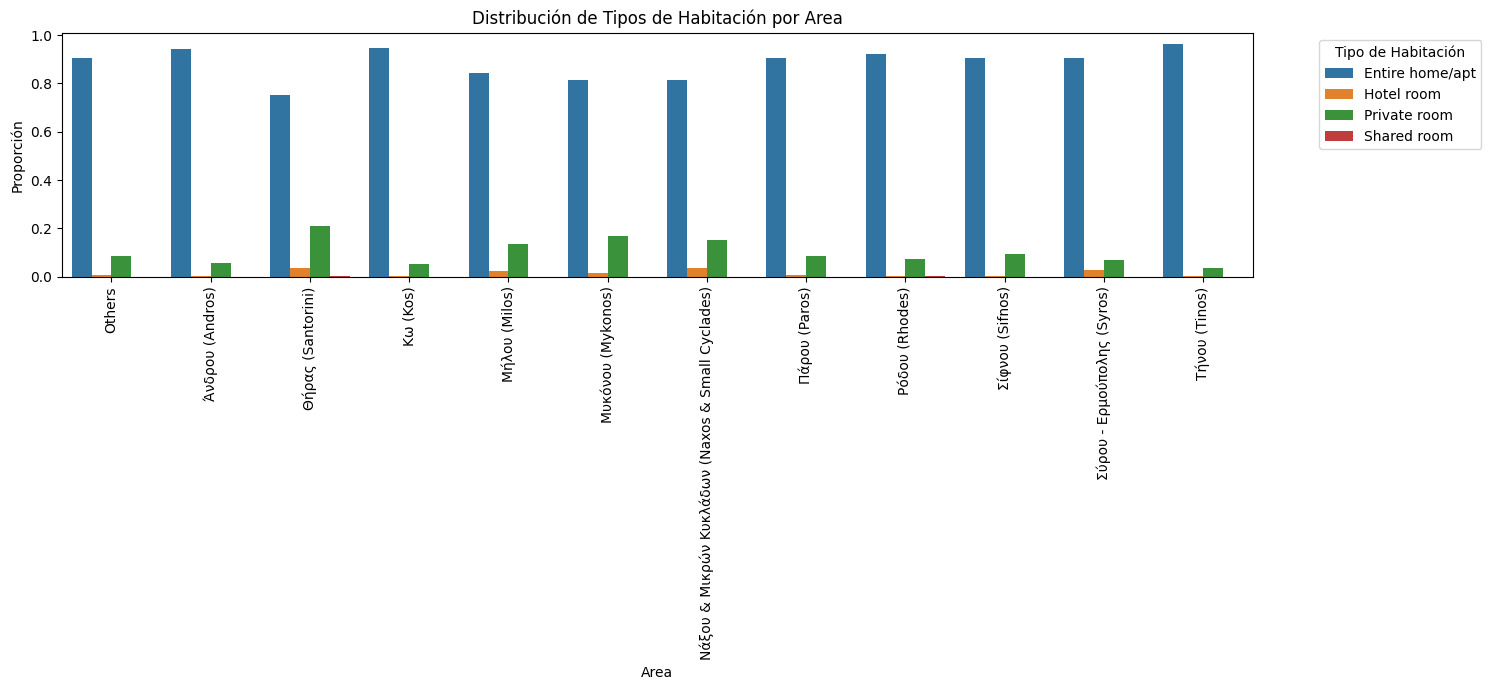

In [46]:
# Distribución de tipos de habitación por area
distribucion_tipo_habitacion_area = df_clean.groupby(['neighbourhood_cleansed', 'room_type'], observed=True).size().reset_index(name='count')
distribucion_tipo_habitacion_area['proporcion'] = distribucion_tipo_habitacion_area['count'] / distribucion_tipo_habitacion_area.groupby('neighbourhood_cleansed', observed=True)['count'].transform('sum')

plt.figure(figsize=(15, 7))
sns.barplot(data=distribucion_tipo_habitacion_area, x='neighbourhood_cleansed', y='proporcion', hue='room_type')
plt.title('Distribución de Tipos de Habitación por Area')
plt.xlabel('Area')
plt.ylabel('Proporción')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Habitación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
room_graph = plt

### IV. Pruebas estadísticas

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
# df_clean["neighbourhood_cleansed"] = df_clean["neighbourhood_cleansed"].astype("category")
# df_clean["room_type"] = df_clean["room_type"].astype("category")
anova = ols('price ~ C(neighbourhood_cleansed) * C(room_type)', data=df_clean).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     58.55
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:42:47   Log-Likelihood:            -1.1105e+05
No. Observations:               18573   AIC:                         2.222e+05
Df Residuals:                   18534   BIC:                         2.225e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                    145.1205      1.728     84.000      0.000     141.734     148.507
C(neighbourhood_cleansed)[T.Άνδρου (Andros)]                                                                  -2.4361      4.212     -0.578      0.563     -10.692       5.820
C(neighbourhood_cleansed)[T.Θήρας (Santorini)]                                                                54.9209      2.956     18.581      0.000      49.127      60.715
C(neighbourhood_cleansed)[T.Κω (Kos)]                                                                        -20.4601      4.028     -5.079      0.000     -28.356     -12.565
C(neighbourhood_cleansed)[T.Μήλου (Milos)]                                                                    43.8323      4.170     10.510      0.000      35.658      52.007
C(neighbourhood_cleansed)[T.Μυκόνου (Μykonos)]                                                                93.1721      3.315     28.109      0.000      86.675      99.669
C(neighbourhood_cleansed)[T.Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)]                                 -0.1665      2.909     -0.057      0.954      -5.868       5.535
C(neighbourhood_cleansed)[T.Πάρου (Paros)]                                                                    39.0344      2.801     13.936      0.000      33.544      44.525
C(neighbourhood_cleansed)[T.Ρόδου (Rhodes)]                                                                    4.4607      2.469      1.807      0.071      -0.378       9.299
C(neighbourhood_cleansed)[T.Σίφνου (Sifnos)]                                                                  22.1884      4.959      4.474      0.000      12.468      31.909
C(neighbourhood_cleansed)[T.Σύρου - Ερμούπολης (Syros)]                                                      -18.2522      4.165     -4.382      0.000     -26.416     -10.089
C(neighbourhood_cleansed)[T.Τήνου (Tinos)]                                                                     1.1182      3.523      0.317      0.751      -5.787       8.024
C(room_type)[T.Hotel room]                                                                                   -18.2687     18.503     -0.987      0.323     -54.536      17.999
C(room_type)[T.Private room]                                                                                 -49.2171      5.881     -8.369      0.000     -60.744     -37.691
C(room_type)[T.Shared room]                                                                                 

Aunque el r² es bajo (Solo explica el 10% de la variabilidad de los datos), y el modelo tiene posibilidades de mejora (aumentando la selección de variables, o buscando otras con menor colinealidad) se puede decir hasta este punto:


- El estadístico de Durbin-Watson (1.898) está cerca de 2. Esto indica que los errores son independientes entre sí, cumpliendo con este supuesto.
- Como se vio en el gráfico de dispersión, y se puede ver con el r², las relaciones entre las variables pueden ser más complejas, o hasta este punto se omiten variables importantes
- La alta dispersión de valores p y los valores altos de estadísticos como el Omnibus sugieren que podría haber problemas de heteroscedasticidad
- El rendimiento del análisis esta sujeto al desbalanceo que hay en las variables categoricas, por lo tanto, filtrare de nuevo el dataset, para comparar una unica categoria de tipo de habitación, (la predominante), con las distintas áreas para cada una de la media de precios.

Heatmaps:
- Crear heatmaps que visualicen la relación entre price y number_of_reviews por area, ayudando a identificar zonas con alta demanda y precios competitivos.
Boxplots:
- Utilizar boxplots para comparar la distribución de price entre los diferentes tipos de habitación y areas, facilitando la identificación de tendencias y outliers.

In [49]:
df_clean["room_type"].unique()[0]

'Entire home/apt'

In [50]:
df_2_model = df_clean[df_clean["room_type"] == "Entire home/apt"]
df_2_model.shape

(16296, 5)

In [51]:
anova2 = ols('price ~ C(neighbourhood_cleansed)', data=df_2_model).fit()
anova2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.93e-304
Time:                        16:42:47   Log-Likelihood:                -97739.
No. Observations:               16296   AIC:                         1.955e+05
Df Residuals:                   16284   BIC:                         1.956e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       145.1205      1.758     82.526      0.000     141.674     148.567
C(neighbourhood_cleansed)[T.Άνδρου (Andros)]                                     -2.4361      4.287     -0.568      0.570     -10.839       5.967
C(neighbourhood_cleansed)[T.Θήρας (Santorini)]                                   54.9209      3.009     18.255      0.000      49.024      60.818
C(neighbourhood_cleansed)[T.Κω (Kos)]                                           -20.4601      4.100     -4.990      0.000     -28.497     -12.423
C(neighbourhood_cleansed)[T.Μήλου (Milos)]                                       43.8323      4.245     10.326      0.000      35.512      52.153
C(neighbourhood_cleansed)[T.Μυκόνου (Μykonos)]                                   93.1721      3.374     27.615      0.000      86.559      99.785
C(neighbourhood_cleansed)[T.Νάξου & Μικρών Κυκλάδων (Naxos & Small Cyclades)]    -0.1665      2.961     -0.056      0.955      -5.970       5.637
C(neighbourhood_cleansed)[T.Πάρου (Paros)]                                       39.0344      2.851     13.691      0.000      33.446      44.623
C(neighbourhood_cleansed)[T.Ρόδου (Rhodes)]                                       4.4607      2.513      1.775      0.076      -0.464       9.386
C(neighbourhood_cleansed)[T.Σίφνου (Sifnos)]                                     22.1884      5.048      4.396      0.000      12.294      32.083
C(neighbourhood_cleansed)[T.Σύρου - Ερμούπολης (Syros)]                         -18.2522      4.239     -4.305      0.000     -26.562      -9.943
C(neighbourhood_cleansed)[T.Τήνου (Tinos)]                                        1.1182      3.586      0.312      0.755      -5.911       8.147
==============================================================================
Omnibus:                     2913.795   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4781.895
Skew:                           1.225   Prob(JB):                         0.00
Kurtosis:                       4.021   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Generación de resultados

Revisar documento word!